#Dataset from handwrite by
##National Institute of Standards and Technology

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, InputLayer
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import BatchNormalization

In [2]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

import keras
print("Keras version:", keras.__version__)

TensorFlow version: 2.17.0
Keras version: 3.4.1


In [3]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


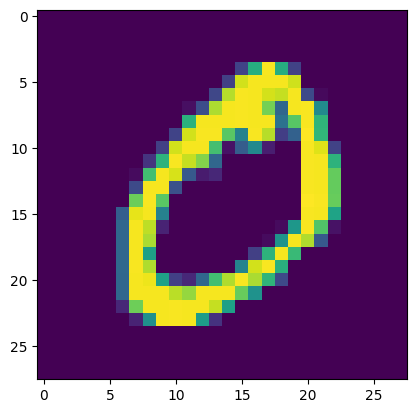

In [5]:
# visualizer
plt.imshow(X_train[1])

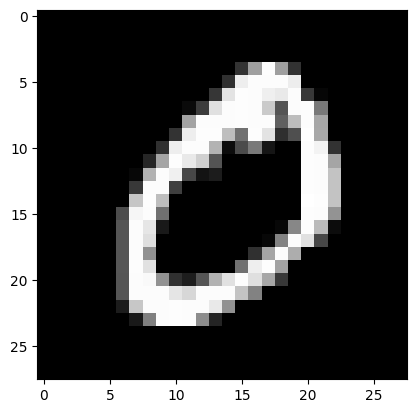

In [6]:
# Show numbers in the training dataframe in grayscale to reduce the channels from RGB to gray
plt.imshow(X_train[1], cmap ='gray')

In [10]:
# change to 28x28, on channel
train = X_train.reshape(X_train.shape[0],28,28,1)
test = X_test.reshape(X_test.shape[0],28,28,1)
train = train.astype('float32')
test = test.astype('float32')
# normalization
train /= 255
test /= 255

In [11]:
from tensorflow.keras.utils import to_categorical

# resctrict number for probability in output for 10 class
class_train = to_categorical(y_train, 10)
class_test = to_categorical(y_test, 10)

In [19]:
# augumentation generator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
new_images_train = ImageDataGenerator(
    rotation_range=10,
    horizontal_flip=True,
    zoom_range=0.10,
    shear_range=0.2,
    width_shift_range=0.1,
    height_shift_range=0.1
)
new_images_test = ImageDataGenerator()
base_train = new_images_train.flow(train, class_train, batch_size=128)
base_test = new_images_test.flow(test, class_test, batch_size=128)
len(base_train) , len(train)

(469, 60000)

In [21]:
# convolution operator
# first inicialization model
classificator = Sequential()
# - add layer conv2D with 32 kernel with size 3x3 size from feature detector (matriz)
# - strides mean how to move the pixels
# - padding refers to the addition of extra pixels around the border of an input image. This is done
# to control the spatial dimensions of the output feature maps (results from apply kernel, filter)
classificator.add(Conv2D(32, kernel_size=(3,3),
                         strides=(1,1),
                         activation='relu',
                         input_shape=(28,28,1)))
classificator.add(BatchNormalization())
classificator.add(MaxPooling2D(pool_size=(2,2)))

classificator.add(Conv2D(32, (3,3), activation='relu'))
classificator.add(BatchNormalization())
classificator.add(MaxPooling2D(pool_size=(2,2)))
classificator.add(Flatten())

# This point finished the convolutional, 128 neurons
classificator.add(Dense(128, activation='relu'))
# dropout for avoid overfitting and less sparse, 20% input will become 0
classificator.add(Dropout(0.2))
classificator.add(Dense(128, activation='relu'))
classificator.add(Dropout(0.2))
classificator.add(Dense(10, activation='softmax'))

classificator.compile(loss='categorical_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])
classificator.fit(base_train,
                  batch_size=128,
                  epochs=10,
                  verbose=1,
                  validation_data=base_test)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


469/469 ━━━━━━━━━━━━━━━━━━━━ 89s 180ms/step - accuracy: 0.6728 - loss: 0.9681 - val_accuracy: 0.9351 - val_loss: 0.2204
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 83s 177ms/step - accuracy: 0.9212 - loss: 0.2512 - val_accuracy: 0.9785 - val_loss: 0.0702
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 176ms/step - accuracy: 0.9454 - loss: 0.1754 - val_accuracy: 0.9757 - val_loss: 0.0776
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 173ms/step - accuracy: 0.9543 - loss: 0.1515 - val_accuracy: 0.9777 - val_loss: 0.0640
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 172ms/step - accuracy: 0.9582 - loss: 0.1348 - val_accuracy: 0.9672 - val_loss: 0.1047
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 173ms/step - accuracy: 0.9617 - loss: 0.1250 - val_accuracy: 0.9810 - val_loss: 0.0573
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 172ms/step - accuracy: 0.9631 - loss: 0.1242 - val_accuracy: 0.9803 - val_loss: 0.0629
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 81s 172ms/step - accuracy: 0.9663 - loss: 0.1091 - va